In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams.update({'text.usetex': True})
mpl.rcParams.update({'font.size': 18})#, 'font.style': 'normal', 'font.family':'serif'})

In [3]:
data = np.loadtxt('populations.txt')
years, hares, lynxes, carrots = data.T

***
# Exercise 1 
* Make a plot with four subplots.
* In the first three plots, plot only the populations of hare, lynxes, carrots, and in the fourth plot all of them together
* Work on the appearance of the plots, based on the principles we have outlines so far (data-ink ratio, consistency, clarity, integrity, and so on). For example, make sure that we know which plot corresponds to hares, lynxes, and carrots. And make sure that you use the same color for the same thing.
***
# Exercise 2
Look at [ this example](http://matplotlib.org/examples/pylab_examples/axes_props.html) on how to add a grid and change its properties (and axes properties). Try to implemente it in one of your plots.
***

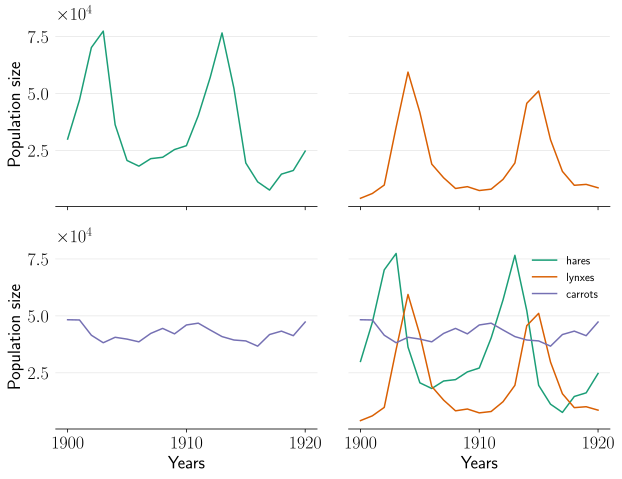

In [4]:
fig, axes = plt.subplots(2,2, figsize=(9,7), sharey='all', sharex='all')
axes = axes.flatten()
pops   = [hares,lynxes,carrots]
colors = ['#1b9e77','#d95f02','#7570b3']
labels = ['hares','lynxes','carrots']

# plots
[ax.plot(years.astype(int), a, c=c) for a, ax, c in zip(pops, axes[:3],colors)]
[axes[-1].plot(years,a,c=c,label=l) for a,c,l in zip(pops,colors,labels)]

# rifiniture
[ax.spines[s].set_visible(False) for s in ['right','top','left'] for ax in axes]
[ax.grid(axis='y', alpha=0.3) for ax in axes]
[ax.yaxis.set_tick_params(width=0.) for ax in axes]

def format_ylabels(ax):
    ax.set_yticks([25000,50000,75000])
    ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')

[line[0].set_ylabel('Population size') for line in axes.reshape(2,2)]
[ax.set_xlabel('Years') for ax in axes[-2:]]
[format_ylabels(ax) for ax in axes]

leg = axes[-1].legend(frameon=False, fontsize=12)


plt.tight_layout()

***
# Exercise 3
* Do you like the radial plot we created? Do you see any caveats, things you would do differently?
* Create a stacked barchart in polar coordinates for hares and lynxes. This is a bit like the nightingale rose shown in the first class, but the bars do not start from the center. 
* What problems do you see with such a representation?

***

Example of an exaggerate experimentation:

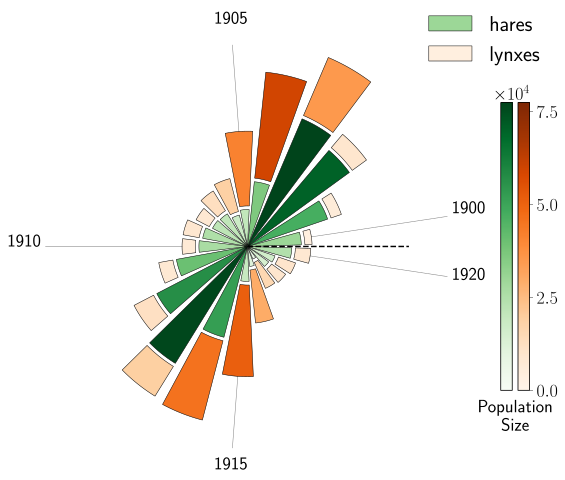

In [5]:
# creating the axes
fig = plt.figure(figsize=(8,8))
ax = plt.axes([0.025,0.025,0.75,0.75], polar=True)
cm_x, cm_y, cm_width = 0.84, 0.15, 0.02
axes_cmaps = (plt.axes([cm_x,cm_y,cm_width,0.5]),
              plt.axes([cm_x+cm_width+0.01,cm_y,cm_width,0.5]))

# plot
N = len(years)
theta = np.linspace(0.0, 2*np.pi, N+1)[:-1] + np.pi/N
mywidth = 0.8*(2*np.pi/N) #80% radial space used
rmax=max(lynxes.max(),hares.max())
cmaps = [plt.cm.Greens,plt.cm.Oranges]
for i,(a,l,cmap) in enumerate(zip([hares,lynxes],['hares','lynxes'],cmaps)):
    bars = ax.bar(theta, a, width=mywidth, bottom=(2000+hares)*i, lw=0.5, ec='k',label=l)
    for r,bar in zip(a, bars): 
        1
        bar.set_facecolor(cmap(r/rmax)) 
        #bar.set_alpha(1)

# colorbars
axes_cmaps[1].yaxis.set_tick_params(width=0.4);
for i,(ax_cmap,cmap) in enumerate(zip(axes_cmaps,cmaps)):
    cb = plt.colorbar(plt.cm.ScalarMappable(mpl.colors.Normalize(vmin=0,vmax=rmax), cmap=cmap), cax=ax_cmap)
    if i==0:
        cb.set_ticks([])
    if i==1:
        cb.formatter.set_scientific(True)
        cb.set_ticks([0,25000,50000,75000])
        cb.formatter.set_powerlimits((0,0))

fig.text(cm_x+0.025,cm_y-0.07,'Population\nSize', horizontalalignment='center')

plt.sca(ax)
# line 0
line = mpl.lines.Line2D([0,0],[0,90000],ls='--',c='k')
ax.add_line(line)
# lines for the years
every_n_years = 5
[ax.text(t, r, y, horizontalalignment='center') for t,r,y in filter(lambda x:x[2]%every_n_years==0, zip(theta,np.ones(len(lynxes))*(lynxes+hares).max()+12000,years.astype(int)))]
[ax.add_line(mpl.lines.Line2D([t,t],[r,(lynxes+hares).max()], ls='-', c='k', lw=0.5, alpha=0.5)) for t,r,y in filter(lambda x:x[2]%every_n_years==0,zip(theta,lynxes+hares+2000,years.astype(int)))]

## finishing touch
plt.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
plt.legend(loc=(0.9,0.9), fontsize='large', frameon=False);

Same data ink ratio, but a more compact view.
Was there a reason for the separation between the bars?

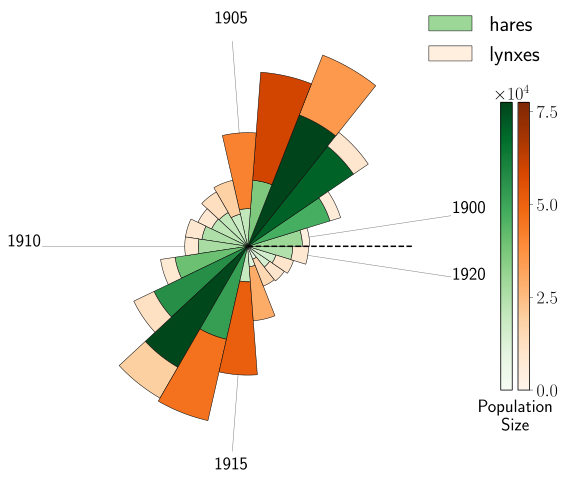

In [6]:
# creating the axes
fig = plt.figure(figsize=(8,8))
ax = plt.axes([0.025,0.025,0.75,0.75], polar=True)
cm_x, cm_y, cm_width = 0.84, 0.15, 0.02
axes_cmaps = (plt.axes([cm_x,cm_y,cm_width,0.5]),
              plt.axes([cm_x+cm_width+0.01,cm_y,cm_width,0.5]))

# plot
N = len(years)
theta = np.linspace(0.0, 2*np.pi, N+1)[:-1] + np.pi/N
mywidth = 1*(2*np.pi/N) #100% radial space used
rmax=max(lynxes.max(),hares.max())
cmaps = [plt.cm.Greens,plt.cm.Oranges]
white_space = 0
for i,(a,l,cmap) in enumerate(zip([hares,lynxes],['hares','lynxes'],cmaps)):
    bars = ax.bar(theta, a, width=mywidth, bottom=(white_space+hares)*i, lw=0.5, ec='k',label=l)
    for r,bar in zip(a, bars): 
        1
        bar.set_facecolor(cmap(r/rmax)) 
        #bar.set_alpha(1)

# colorbars
axes_cmaps[1].yaxis.set_tick_params(width=0.4);
for i,(ax_cmap,cmap) in enumerate(zip(axes_cmaps,cmaps)):
    cb = plt.colorbar(plt.cm.ScalarMappable(mpl.colors.Normalize(vmin=0,vmax=rmax), cmap=cmap), cax=ax_cmap)
    if i==0:
        cb.set_ticks([])
    if i==1:
        cb.formatter.set_scientific(True)
        cb.set_ticks([0,25000,50000,75000])
        cb.formatter.set_powerlimits((0,0))

fig.text(cm_x+0.025,cm_y-0.07,'Population\nSize', horizontalalignment='center')

plt.sca(ax)
# line 0
line = mpl.lines.Line2D([0,0],[0,90000],ls='--',c='k')
ax.add_line(line)
# lines for the years
every_n_years = 5
[ax.text(t, r, y, horizontalalignment='center') for t,r,y in filter(lambda x:x[2]%every_n_years==0, zip(theta,np.ones(len(lynxes))*(lynxes+hares).max()+10000+white_space,years.astype(int)))]
[ax.add_line(mpl.lines.Line2D([t,t],[r,(lynxes+hares).max()], ls='-', c='k', lw=0.5, alpha=0.5)) for t,r,y in filter(lambda x:x[2]%every_n_years==0,zip(theta,lynxes+hares+white_space,years.astype(int)))]

## finishing touch
plt.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
plt.legend(loc=(0.9,0.9), fontsize='large', frameon=False);

***
# Exercise 4
Take the hares and lynxes, and create a so called [radar chart](https://en.wikipedia.org/wiki/Radar_chart). This is a plot like the ones in the figures below (no bars, but lines or areas). Plot only the average for each species over 5 years.

<img src="radarchart2.png" height="500" width="500">

***

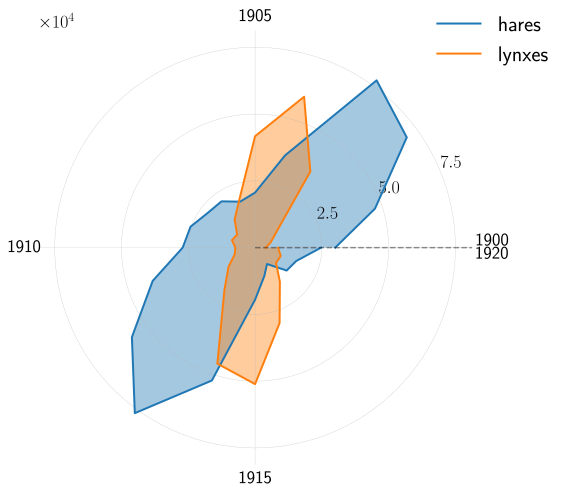

In [7]:
# creating the axes
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111,polar=True)

# plot
N = len(years)
theta = np.linspace(0.0, 2*np.pi, N)#[:-1] + np.pi/N
rmax  = max(lynxes.max(),hares.max())
for i,(a,l,cmap) in enumerate(zip([hares,lynxes],['hares','lynxes'],cmaps)):
    plt.plot(theta, a, label=l, lw=2)
    plt.fill_between(theta, a, alpha=0.4, lw=2)

ax.set_yticks([25000,50000,75000])
ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')

every_n_years = 5
ax.set_xticks([t for i,(t,y) in filter(lambda x:x[0]%every_n_years==0, enumerate(zip(theta,years)))])
ax.set_xticklabels([y if (y!=1900 and y!=1920) else "" for i,(t,y) in filter(lambda x:x[0]%every_n_years==0, enumerate(zip(theta,years.astype(int))))],
                   horizontalalignment='center')
ax.text(0.01,rmax+5000,1900)
ax.text(2*np.pi-0.05,rmax+5000,1920)

# line 0
line = mpl.lines.Line2D([0,0],[0,90000],ls='--',c='k',alpha=0.4)
ax.add_line(line)

ax.spines['polar'].set_visible(False)
plt.grid(lw=0.3, ls='-', alpha=0.8)
#plt.grid(False, axis='x')
plt.legend(loc=(0.9,0.9), fontsize='large', frameon=False);